<a href="https://colab.research.google.com/github/Mangai2024/AI-Text-Generator/blob/main/MNIST_CNN_Project_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 0 Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import  to_categorical

In [3]:
#Step 1 Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train image shapes:", x_train.shape) #(60000, 28, 28)
print("Test iamges shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train image shapes: (60000, 28, 28)
Test iamges shape: (10000, 28, 28)


In [4]:
#Step 2 Preprocessing
#Normalize (0-255 ->0-1)
x_train = x_train.astype("float32") /255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
#Reshape to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28,1)

In [6]:
#One-Hot_Encode labels
num_classes = 10
y_train_cat = to_categorical(y_train,  num_classes)
y_test_cat = to_categorical(y_test, num_classes)
print("Nes train shape:", x_train.shape)
print("New test shape:", x_test.shape)


Nes train shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


In [8]:
#Step 3 Build the CNN model
model = Sequential()

In [9]:
#block 1 : conv
# Block 1: Conv + Pool
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Block 2: Conv + Pool
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Flatten + Dense
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # reduce overfitting

# Output layer (10 digits)
model.add(Dense(num_classes, activation="softmax"))

# See model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# -----------------------------
# Step 4: Compile the model
# -----------------------------
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [11]:

# -----------------------------
# Step 5: Train the model
# -----------------------------
history = model.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - accuracy: 0.7884 - loss: 0.6649 - val_accuracy: 0.9817 - val_loss: 0.0671
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9668 - loss: 0.1146 - val_accuracy: 0.9873 - val_loss: 0.0465
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9750 - loss: 0.0812 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.9907 - val_loss: 0.0366
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9849 - loss: 0.0492 - val_accuracy: 0.9908 - val_loss: 0.0331


In [12]:
# -----------------------------
# Step 6: Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Test accuracy: 0.9900


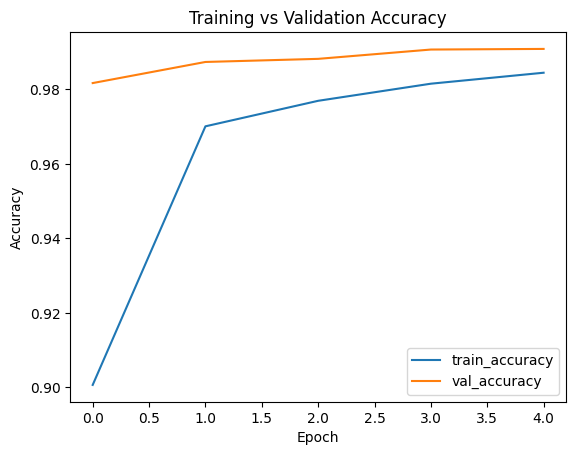

In [13]:
# -----------------------------
# Step 7: Plot accuracy curves
# -----------------------------
plt.figure()
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
True label: 7
Predicted label: 7


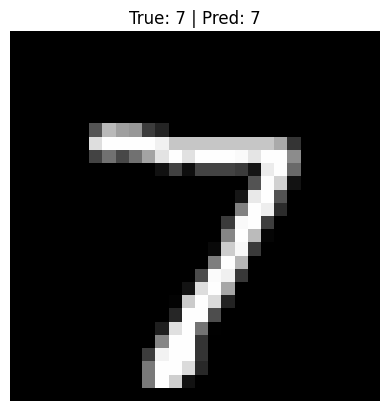

In [14]:
# -----------------------------
# Step 8: Predict on one sample
# -----------------------------
idx = 0  # you can change index
sample = x_test[idx]         # (28,28,1)
true_label = y_test[idx]

sample_input = np.expand_dims(sample, axis=0)  # (1,28,28,1)
pred_probs = model.predict(sample_input)
pred_label = np.argmax(pred_probs)

print("True label:", true_label)
print("Predicted label:", pred_label)

plt.imshow(sample.reshape(28, 28), cmap="gray")
plt.title(f"True: {true_label} | Pred: {pred_label}")
plt.axis("off")
plt.show()

In [15]:
# -----------------------------
# Step 9: Save the model (optional)
# -----------------------------
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5
